# Interpolation

## Vertiefung

### Übersicht

- Interpolationspolynom mit Wolfram|Alpha
- Lineare Interpolation: Bessere Implementation mit `np.searchsorted`
- Interpolation mit `scipy.interpolate`
- Interpolation in 2d `scipy.interpolate`

### Daten generieren

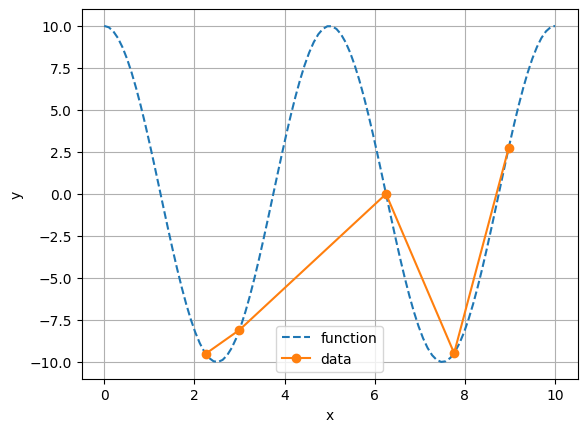

In [2]:
# Daten / Messpunkte
import numpy as np
import matplotlib.pyplot as plt


x_func = np.linspace(0, 10, 100)
y_func = 10 * np.cos(2 * np.pi * x_func / 5)
# 10 ist die amplitude

# gridsampling geht auch
n = 5  # anzahl Sample
rng = np.random.default_rng(7)
x_data = np.round(np.sort(rng.uniform(low=0, high=10, size=n)), 2)
y_data = np.round(10 * np.cos(2 * np.pi * x_data / 5), 2)


plt.plot(x_func, y_func, "--", label="function")
plt.plot(x_data, y_data, "o-", label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


### Interpolationspolynom mit Wolfram|Alpha

Die Abfrage muss folgende Form haben:

```
interpolate ((x1, y1), (x2, y2), ..., (xn, yn))
```

Menge sind klammern, runde sind praktisch aufgrund Tuples


In [3]:
x_data  # gegeben
y_data  # gegeben

data = tuple(zip(x_data, y_data))
print("interpolate", data)


interpolate ((2.25, -9.51), (3.0, -8.09), (6.25, 0.0), (7.76, -9.47), (8.97, 2.73))


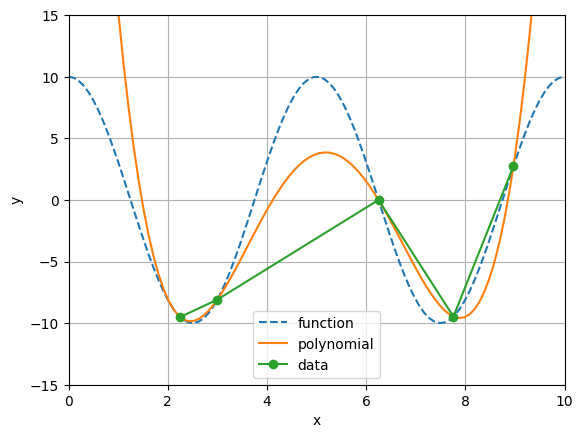

In [6]:
def interpolating_polynomial(x):
    #return -0.0473365*x**4 + 0.952326*x**3 - 5.3204*x**2 + 5.40659*x + 6.6953
    return 0.249477*x**4 - 5.16599*x**3 + 36.4345*x**2 - 100.289*x + 84.1405

y_poly = interpolating_polynomial(x_func)


plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_func, y_poly, '-', label="polynomial")
plt.plot(x_data, y_data, 'o-', label="data")
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Lineare Interpolation

Schritte

1. Index der benachbarten Datenpunkte suchen: [`np.searchsorted()`](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html)
2. Lineare Interpolation mithilfe der benachbarten Datenpunkte konstruieren

$$ y = \frac{y_i - y_{i-1}}{x_i-x_{i-1}}\cdot \left(x - x_{i-1}\right) + y_{i-1} $$

Funktion die das x als Parameter nimmt und die Punkte rechts und links berechnet. 
Im prinzip streckt er jeweils die Punkte weiter nach rechts/ links und sucht den Ersten Pukt der dort zu finden ist. 


Funktion where:     where if ... then... else 

Funktion where -> gibt den ersten Wert der sich rechts/links befindet wenn die bedingungen erfüllt sind. 

The function performs a linear interpolation to estimate the value of a function at a given point ``x``.

The function assumes that ``x_data`` and ``y_data`` are arrays of equal length, which contain the x and y coordinates of a set of points that define a piecewise linear function.

The function first finds the index of the point in ``x_data`` that is just larger than ``x``, and then selects the neighboring points to the ``left and right of x`` in the ``x_data`` and ``y_data`` arrays. **It then calculates the slope of the line connecting these two neighboring points and uses this slope to interpolate the function value at x.**

The function returns the estimated function value at ``x``. If ``x`` is outside the range of ``x_data``, then the function returns the function value at the nearest endpoint of the piecewise linear function.

In [8]:
def lin_interp(x):
    n = len(x_data)
    i_upper = np.searchsorted(x_data, x)
    i_upper = np.where(i_upper < n, i_upper, n - 1)
    i_upper = np.where(i_upper > 1, i_upper, 1)
    i_lower = i_upper - 1
    x_upper = x_data[i_upper]
    y_upper = y_data[i_upper]
    x_lower = x_data[i_lower]
    y_lower = y_data[i_lower]
    return (y_upper - y_lower) / (x_upper - x_lower) * (x - x_lower) + y_lower

In [10]:
y_lin_interp = lin_interp(x_func)
y_lin_interp

array([-13.77      , -13.57875421, -13.38750842, -13.19626263,
       -13.00501684, -12.81377104, -12.62252525, -12.43127946,
       -12.24003367, -12.04878788, -11.85754209, -11.6662963 ,
       -11.47505051, -11.28380471, -11.09255892, -10.90131313,
       -10.71006734, -10.51882155, -10.32757576, -10.13632997,
        -9.94508418,  -9.75383838,  -9.56259259,  -9.3713468 ,
        -9.18010101,  -8.98885522,  -8.79760943,  -8.60636364,
        -8.41511785,  -8.22387205,  -8.01456876,  -7.76313131,
        -7.51169386,  -7.26025641,  -7.00881896,  -6.75738151,
        -6.50594406,  -6.2545066 ,  -6.00306915,  -5.7516317 ,
        -5.50019425,  -5.2487568 ,  -4.99731935,  -4.7458819 ,
        -4.49444444,  -4.24300699,  -3.99156954,  -3.74013209,
        -3.48869464,  -3.23725719,  -2.98581974,  -2.73438228,
        -2.48294483,  -2.23150738,  -1.98006993,  -1.72863248,
        -1.47719503,  -1.22575758,  -0.97432012,  -0.72288267,
        -0.47144522,  -0.22000777,  -0.0791859 ,  -0.71

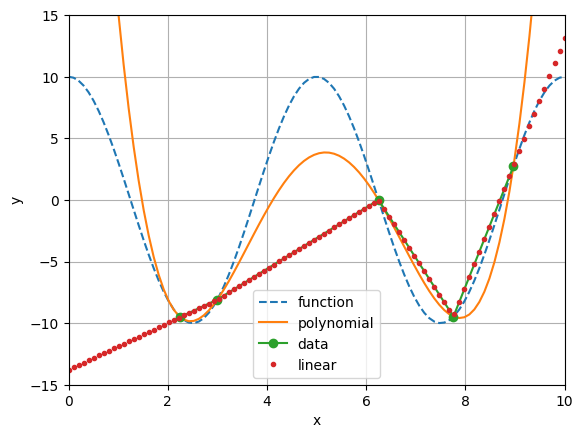

In [11]:
plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_func, y_poly, '-', label="polynomial")
plt.plot(x_data, y_data, 'o-', label="data")
plt.plot(x_func, y_lin_interp, '.', label="linear")
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Interpolation mit SciPy

- Übersicht zu Interpolation mit SciPy [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html).
- Die Funktion [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) ist der wesentliche Einstiegspunkt.

In [ ]:
from scipy import interpolate

kind = "cubic"
interpolating_func = interpolate.interp1d(x_data, y_data, kind=kind)

x = np.linspace(x_data.min(), x_data.max())
y = interpolating_func(x)

plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_func, y_poly, '-', label="polynomial")
plt.plot(x_data, y_data, 'o-', label="data")
plt.plot(x, y, '.', label=f"scipy: {kind}")
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Interpolation mit SciPy in 2 Dimensionen

Hier schauen wir uns die Funktion [`scipy.interpolate.griddata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) an.

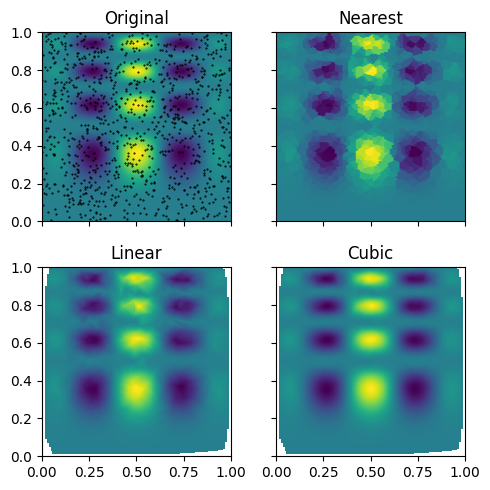

In [12]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5,5))
ax1.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
ax1.plot(points[:,0], points[:,1], 'k.', ms=1)
ax1.set_title('Original')
ax2.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
ax2.set_title('Nearest')
ax3.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
ax3.set_title('Linear')
ax4.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
ax4.set_title('Cubic')
plt.tight_layout()
plt.show()